In [1]:
from pathways import Pathways

In [2]:
p = Pathways(datapackage="sample/datapackage.json")

In [3]:
p.characterize_planetary_boundaries(
    regions=["World",],
    scenarios=[
        "SSP2-Base",
        #"SSP2-RCP26",
    ],
    variables = ["Electricity", ],
)

Calculating LCA results for image...
--- Calculating LCA results for SSP2-Base...
------ Calculating LCA results for 2005...
------ Calculating LCA results for 2010...
------ Calculating LCA results for 2015...
------ Calculating LCA results for 2020...
------ Calculating LCA results for 2025...
------ Calculating LCA results for 2030...
------ Calculating LCA results for 2035...
------ Calculating LCA results for 2040...
------ Calculating LCA results for 2045...
------ Calculating LCA results for 2050...
------ Calculating LCA results for 2060...
------ Calculating LCA results for 2070...
------ Calculating LCA results for 2080...
------ Calculating LCA results for 2090...
------ Calculating LCA results for 2100...


In [4]:
p.lca_results.coords

Coordinates:
  * act_category     (act_category) <U75 'Manufacture of other porcelain and ...
  * variable         (variable) <U11 'Electricity'
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
  * region           (region) <U5 'World'
  * model            (model) object 'image'
  * scenario         (scenario) <U9 'SSP2-Base'
  * impact_category  (impact_category) <U114 'Thiodicarb - water - unspecifie...

In [4]:
p.calculate(
    methods=[
        #x["method"] for x in planetary_boundaries.values()
        #"EF v3.1 - climate change - global warming potential (GWP100)",
        #'selected LCI results - air - CO2, fossil',
        #'IPCC 2021 - climate change - GWP 100a, incl. H and bio CO2',
    ],
    regions=["World",],
    #regions=["World",],
    scenarios=[
        "SSP2-Base",
        #"SSP2-RCP26",
    ],
    #years=[
    #    2020,
    #    #2010
    #],
    #variables=[
    #    v for v in p.scenarios.coords["variable"].values
    #    if v!="Electricity"
    #]
    variables = ["Electricity", ],
    characterization=False
)
arr = p.display_results(cutoff=0.01)

Calculating LCA results for image...
--- Calculating LCA results for SSP2-Base...
------ Calculating LCA results for 2005...
------ Calculating LCA results for 2010...
------ Calculating LCA results for 2015...
------ Calculating LCA results for 2020...
------ Calculating LCA results for 2025...
------ Calculating LCA results for 2030...
------ Calculating LCA results for 2035...
------ Calculating LCA results for 2040...
------ Calculating LCA results for 2045...
------ Calculating LCA results for 2050...
------ Calculating LCA results for 2060...
------ Calculating LCA results for 2070...
------ Calculating LCA results for 2080...
------ Calculating LCA results for 2090...
------ Calculating LCA results for 2100...


In [8]:
[f for f in p.lca_results.coords["impact_category"].values if "carbon dioxide" in f.lower()]

['Carbon dioxide, from soil or biomass stock - air - low population density, long-term - kilogram',
 'Carbon dioxide, non-fossil - air - urban air close to ground - kilogram',
 'Carbon dioxide, to soil or biomass stock - soil - unspecified - kilogram',
 'Carbon dioxide, non-fossil - air - lower stratosphere + upper troposphere - kilogram',
 'Carbon dioxide, non-fossil - air - unspecified - kilogram',
 'Carbon dioxide, from soil or biomass stock - air - lower stratosphere + upper troposphere - kilogram',
 'Carbon dioxide, fossil - air - unspecified - kilogram',
 'Carbon dioxide, fossil - air - low population density, long-term - kilogram',
 'Carbon dioxide, fossil - air - urban air close to ground - kilogram',
 'Carbon dioxide, fossil - air - non-urban air or from high stacks - kilogram',
 'Carbon dioxide, from soil or biomass stock - air - urban air close to ground - kilogram',
 'Carbon dioxide, in air - natural resource - in air - kilogram',
 'Carbon dioxide, to soil or biomass stock 

In [9]:
p.lca_results.sel(impact_category="Carbon dioxide, fossil - air - unspecified - kilogram")

<xarray.DataArray (act_category: 185, variable: 1, year: 15, region: 1,
                   model: 1, scenario: 1)>
array([[[[[[2.96402264e+08]]],


         [[[3.54906666e+08]]],


         [[[3.97858023e+08]]],


         ...,


         [[[1.62800940e+09]]],


         [[[1.81469897e+09]]],


         [[[2.00438482e+09]]]]],

...

       [[[[[0.00000000e+00]]],


         [[[0.00000000e+00]]],


         [[[0.00000000e+00]]],


         ...,


         [[[0.00000000e+00]]],


         [[[0.00000000e+00]]],


         [[[0.00000000e+00]]]]]])
Coordinates:
  * act_category     (act_category) <U75 'Mining of other nonferrous metal or...
  * variable         (variable) <U11 'Electricity'
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
  * region           (region) <U5 'World'
  * model            (model) object 'image'
  * scenario         (scenario) <U9 'SSP2-Base'
    impact_category  <U114 'Carbon dioxide, fossil - air - unspecified - kilo...

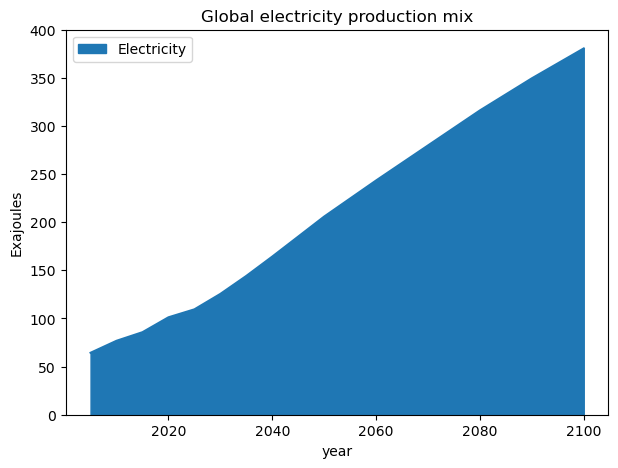

In [5]:
import seaborn as sns
df = p.scenarios.sel(region="World", model="image", pathway="SSP2-Base").to_dataframe("val").unstack()["val"]

import matplotlib.pyplot as plt
df.T.plot(kind="area", stacked=True,
       #color=color_palette, 
       figsize=(7, 5))
plt.ylim(0, 400)
plt.legend(ncols=2)
plt.title("Global electricity production mix")
plt.ylabel("Exajoules")
plt.savefig("electricity_mix_Base.png")

In [7]:
arr_human_health = arr.copy()
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)")] *= 1.15E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)")] *= 2.70E+00
arr_human_health.loc[dict(impact_category="EF v3.1 - particulate matter formation - impact on human health")] *= 2.14E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235")] *= 2.10E-08

In [13]:
p.lca_results.sel(
        model="image",
        scenario="SSP2-Base",
        region="World",
        impact_category="EF v3.1 - climate change - global warming potential (GWP100)"
    ).sum(dim=["act_category", "variable"])/1e3/1e9

<xarray.DataArray (year: 15)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    impact_category  <U60 'EF v3.1 - climate change - global warming potentia...
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
    region           <U5 'World'
    model            <U5 'image'
    scenario         <U9 'SSP2-Base'

In [14]:
p.lca_results.sel(
        model="image",
        scenario="SSP2-Base",
        region="World",
        impact_category="EF v3.1 - climate change - global warming potential (GWP100)"
    ).sum(dim=["act_category", "variable"])/1e3/1e9

<xarray.DataArray (year: 15)>
array([23.61215941, 24.78051733, 28.21516367, 35.00152945, 36.99087931,
       39.8899597 , 42.72311544, 45.61040504, 48.32952551, 47.18497341,
       36.3159623 , 28.77312683, 21.90898907, 22.29171039, 24.79193269])
Coordinates:
    impact_category  <U60 'EF v3.1 - climate change - global warming potentia...
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
    region           <U5 'World'
    model            <U5 'image'
    scenario         <U9 'SSP2-Base'

In [6]:
import numpy as np
all_elec = np.array([
    9284.128746,
    10822.55546,
    11751.26338,
    13154.49659,
    13879.48497,
    15324.33017,
    16971.71386,
    18973.94467,
    20680.4471,
    20869.20293,
    18843.73411,
    19044.38083,
    19493.99837,
    19398.71915,
    19882.06689,
]) * 1e9

coal = np.array([
    7647.148928,
    8917.222898,
    9664.471945,
    11233.23258,
    12174.27898,
    13310.45063,
    14582.37004,
    16350.9504,
    17842.07757,
    17458.07759,
    13901.3199,
    12525.36265,
    11777.23066,
    11047.29605,
    12894.74249
]) * 1e9

years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2060, 2070, 2080, 2090, 2100]

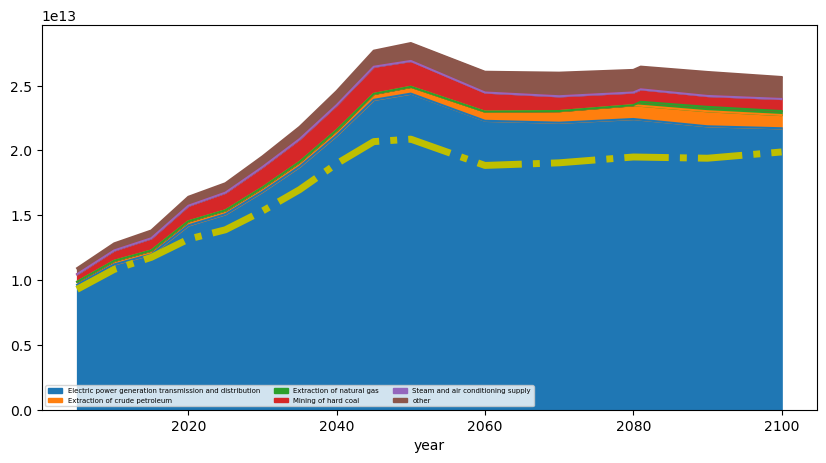

In [7]:
import matplotlib.pyplot as plt
ax = (
    arr.sel(
        model="image",
        scenario="SSP2-Base",
        #region=[r for r in arr.region.values if r!="World"],
        region=["World",],
        #variable=[v for v in arr.coords["variable"].values if v!="Electricity"],
        variable=["Electricity"],
        impact_category="EF v3.1 - climate change - global warming potential (GWP100)",
    ).sum(dim=["region", "variable"])
).to_dataframe("val").unstack()["val"].plot(kind="area", stacked=True, figsize=(10, 5))

ax.plot(years, all_elec, linewidth=5, c="y", linestyle="-.")


plt.legend(ncols=3, fontsize=5)

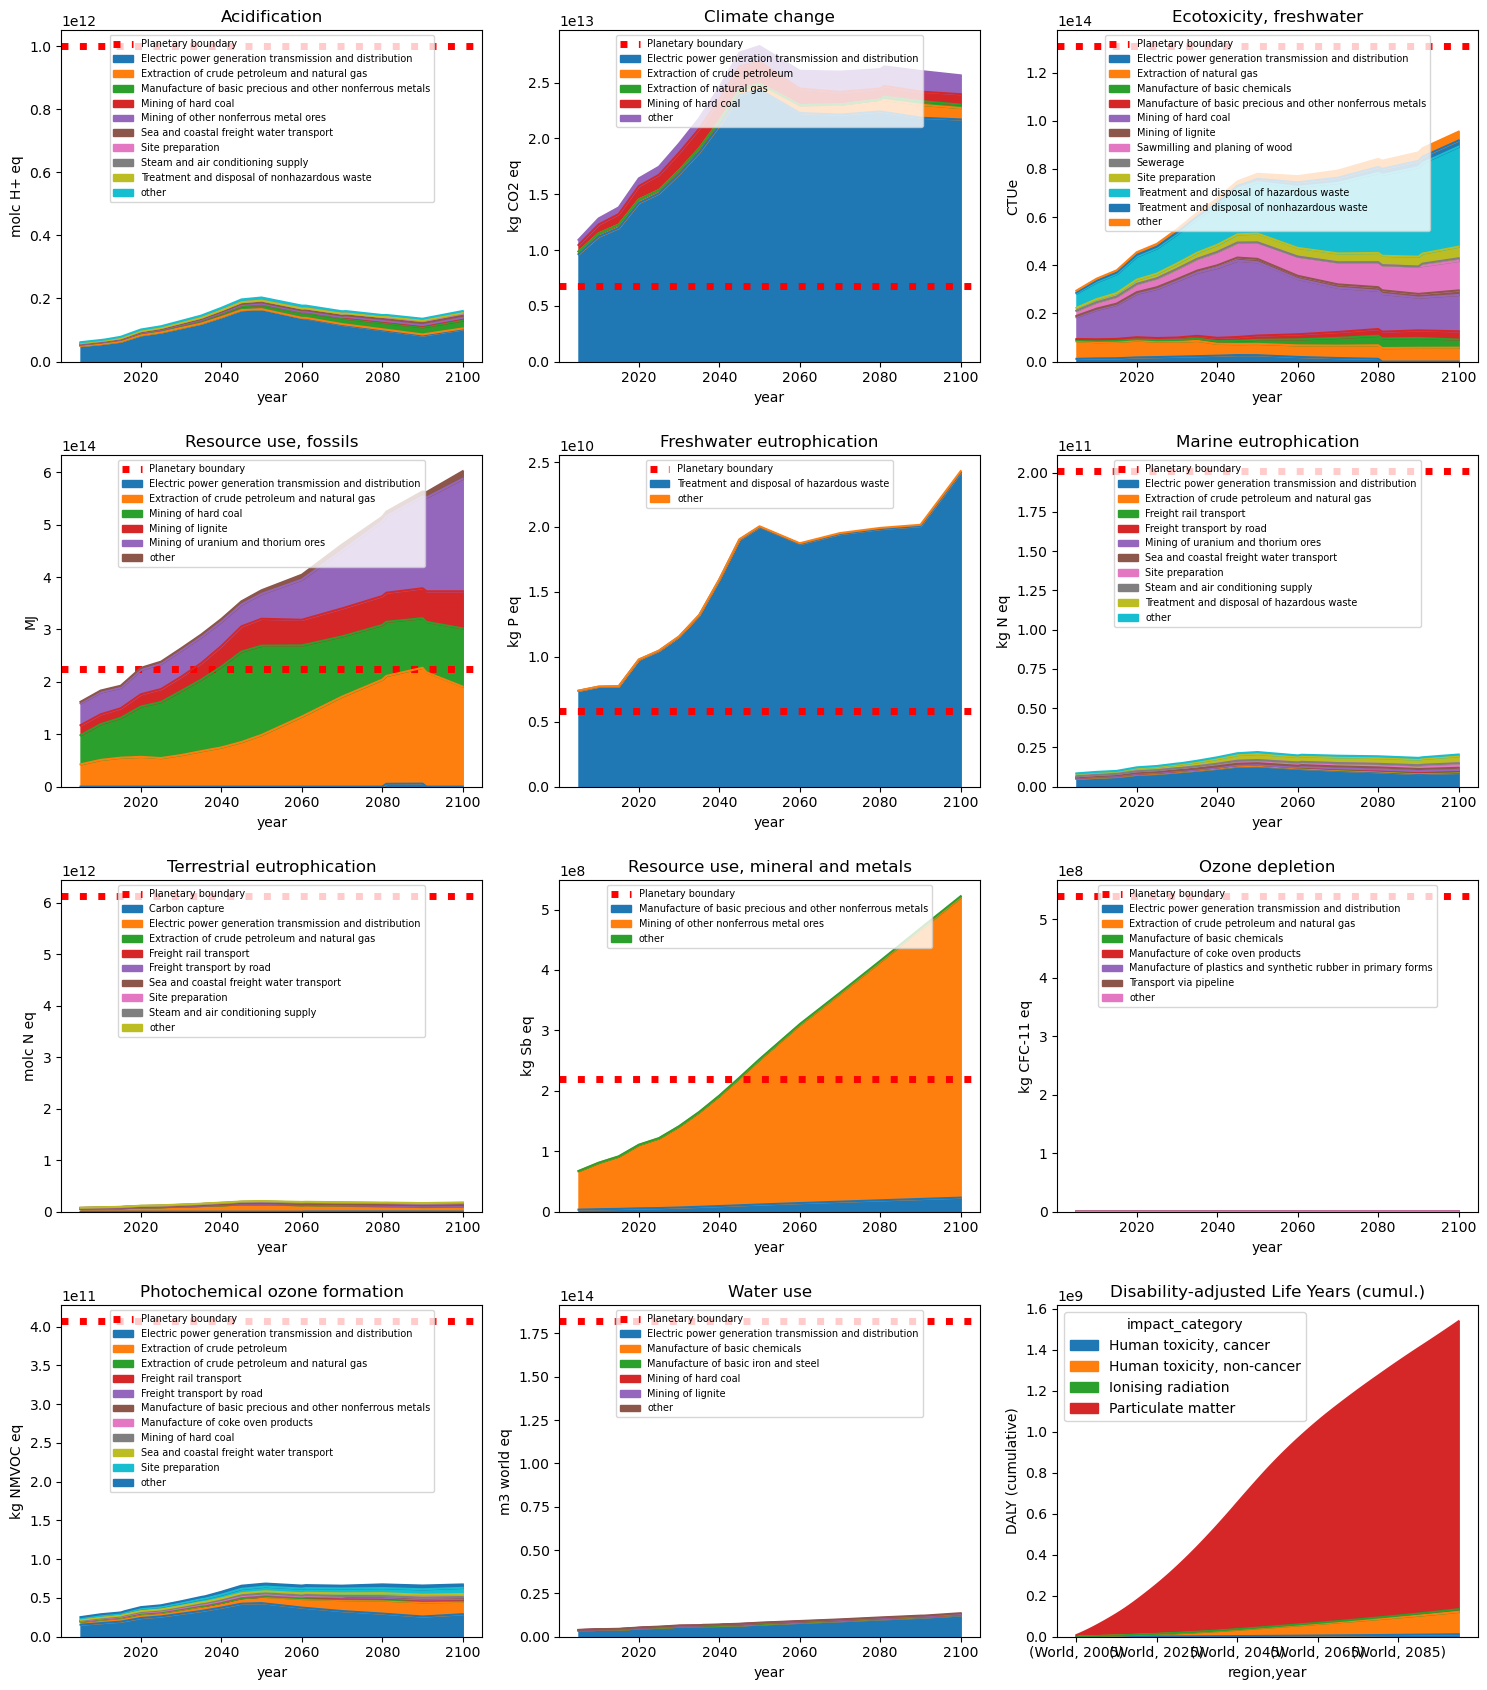

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

arr_human_health = arr.copy()
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)")] *= 1.15E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)")] *= 2.70E+00
arr_human_health.loc[dict(impact_category="EF v3.1 - particulate matter formation - impact on human health")] *= 2.14E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235")] *= 2.10E-08

scenario="SSP2-Base"

# Fill NaNs with 0 (optional, depending on how you want to handle NaNs)
df = arr.sel(model="image", scenario=scenario).to_dataframe("val").unstack()["val"].reset_index()
df_base = arr.sel(model="image", scenario="SSP2-Base").to_dataframe("val").unstack()["val"].reset_index()

d_titles = {
    'Cumulative Energy Demand (CED) - total - energy content (HHV)': "Cumulative Energy Demand",
    'IPCC 2021 - climate change - GWP 100a, incl. H': "climate change, 100y",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "use of net fresh water",
    'selected LCI results, additional - air - particulates': "air - particulates",
    'selected LCI results - resource - land occupation': "land occupation",
    'EF v3.1 - climate change - global warming potential (GWP100)': "climate change",
    'EF v3.1 - ozone depletion - ozone depletion potential (ODP)': "ozone depletion",
    'EF v3.1 - photochemical oxidant formation: human health - tropospheric ozone concentration increase': "Photochemical ozone formation",
    'EF v3.1 - eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)': "freshwater eutrophication",
    'EF v3.1 - eutrophication: marine - fraction of nutrients reaching marine end compartment (N)': "marine eutrophication",
    'EF v3.1 - acidification - accumulated exceedance (AE)': "ocean acidification",
    'EF v3.1 - eutrophication: terrestrial - accumulated exceedance (AE)': "terrestrial eutrophication",
    'selected LCI results - resource - land occupation': "land use",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "use of freshwater"
}

d_titles.update(
  {v["method"]: k for k, v in planetary_boundaries.items()}
)

d_units = {
    'Cumulative Energy Demand (CED) - total - energy content (HHV)': "MJ primary",
    'IPCC 2021 - climate change - GWP 100a, incl. H': "kg CO$_2$-eq.",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "m$^3$",
    'selected LCI results, additional - air - particulates': "kg",
    'selected LCI results - resource - land occupation': "m$^2$-year",
}
d_units.update(
    {v["method"]: v["unit"] for k, v in planetary_boundaries.items()}
)

# Define your categories
impact_categories = df['impact_category'].unique()


fig, axs = plt.subplots(4, 3, figsize=(15, 17))
axs = axs.ravel()  # flatten the array to iterate over it

skip_cats = [
    "EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)",
    "EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)",
    "EF v3.1 - particulate matter formation - impact on human health",
    "EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235",
]

impact_categories = [i for i in impact_categories if i not in skip_cats]

for ax, impact_category in zip(axs, impact_categories):
    if impact_category in skip_cats:
        continue
    
    ax.axhline(planetary_boundaries[d_titles[impact_category]]["value"], 0, 6, linewidth=5, color = 'r', linestyle=":", label="Planetary boundary")
    
    df_ = df[df["impact_category"] == impact_category]
    df_ = df_.set_index("year")
    
    df_ = df_.fillna(0)
    
    # Calculate total impact for each row
    df_['total'] = df_.loc[:, "Carbon capture":"Treatment and disposal of nonhazardous waste"].select_dtypes(include=[np.number]).sum(axis=1)

    # Calculate proportion for each numeric column
    proportions = df_.loc[:, "Carbon capture": "Treatment and disposal of nonhazardous waste"].divide(df_['total'], axis=0)

    # Identify columns where all values are less than 1% of the total
    cols_to_move = proportions.columns[(proportions.sum() < 0.01)]

    # Add these values to 'other' column
    df_['other'] += df_.loc[:, cols_to_move].sum(axis=1)

    # Drop these columns
    df_ = df_.drop(columns=cols_to_move)

    # Drop the 'total' column as it's not needed anymore
    df_ = df_.drop(columns='total')

    df_.plot(kind="area", stacked=True, ax=ax)
    
    ax.set_title(d_titles[impact_category])
    ax.set_ylabel(d_units.get(impact_category))
    
    # Set the title for each subplot
    #ax.legend(ncols=4)
    ax.legend(fontsize=7, loc="upper center", ncols=1)
    

# Fill NaNs with 0 (optional, depending on how you want to handle NaNs)
df = arr_human_health.sel(model="image", scenario=scenario, impact_category=skip_cats).sum(dim="act_category").to_dataframe("val").unstack()["val"].reset_index()
df = df.groupby(["region", "year", "impact_category"]).sum().unstack()["Electricity"]
df = df.rename(columns={
    'EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, cancer',
    'EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, non-cancer',
    'EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235': 'Ionising radiation',
    'EF v3.1 - particulate matter formation - impact on human health': 'Particulate matter'
})
df.cumsum().plot(kind="area", stacked=True, ax=axs[11])
# Create a pivot table where index is 'year', columns are 'act_category', and values are 'WEU'
#pivot = df.pivot_table(values='World', index='year', columns='impact_category', fill_value=0)


# Create the stackplot
#axs[11].stackplot(pivot.index, pivot.T.cumsum(1), labels=pivot.columns)

axs[11].set_title("Disability-adjusted Life Years (cumul.)")
axs[11].set_ylabel("DALY (cumulative)")

#df = arr_human_health.sel(model="image", scenario=scenario, impact_category=skip_cats).sum(dim="act_category").to_dataframe("val").unstack()["val"].reset_index()    
# Create a pivot table where index is 'year', columns are 'act_category', and values are 'WEU'
#pivot = df.pivot_table(values='World', index='year', columns='impact_category', fill_value=0)
#pivot = pivot.rename(columns={
#    'EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, cancer',
#    'EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, non-cancer',
#    'EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235': 'Ionising radiation',
#    'EF v3.1 - particulate matter formation - impact on human health': 'Particulate matter'
#})
#axs[11].plot(pivot.index, pivot.T.cumsum(1).sum(0), linewidth=3, c="orange", linestyle="dotted", label="SSP2-Base")

#axs[11].legend(fontsize=7, loc="upper center")

# Automatically adjust the subplot layout
plt.tight_layout()

# Display the figure
plt.savefig("results_RCP26.png")
plt.show()


In [130]:
import bw2io

In [132]:
bw2io.bw2setup??

Signature: bw2io.bw2setup()
Docstring: <no docstring>
Source:   
def bw2setup():
    if "biosphere3" in databases:
        print("Biosphere database already present!!! No setup is needed")
        return
    print("Creating default biosphere\n")
    create_default_biosphere3()
    print("Creating default LCIA methods\n")
    create_default_lcia_methods()
    print("Creating core data migrations\n")
    create_core_migrations()
File:      /opt/homebrew/Caskroom/miniforge/base/envs/ab/lib/python3.9/site-packages/bw2io/__init__.py
Type:      function

In [70]:
(df_.loc[:, "Carbon capture": "Treatment and disposal of nonhazardous waste"] / df_.loc[:, 'total'] < 0.01).all()

Carbon capture                                             False
Electric power generation transmission and distribution    False
Extraction of crude petroleum                              False
Extraction of crude petroleum and natural gas              False
Extraction of natural gas                                  False
                                                           ...  
2096                                                       False
2097                                                       False
2098                                                       False
2099                                                       False
2100                                                       False
Length: 123, dtype: bool

In [54]:
df_

act_category,region,impact_category,variable,Carbon capture,Electric power generation transmission and distribution,Extraction of crude petroleum,Extraction of crude petroleum and natural gas,Extraction of natural gas,Freight rail transport,Freight transport by road,...,Mining of uranium and thorium ores,Sawmilling and planing of wood,Sea and coastal freight water transport,Sewerage,Site preparation,Steam and air conditioning supply,Transport via pipeline,Treatment and disposal of hazardous waste,Treatment and disposal of nonhazardous waste,other
year,,,,,,,,,,,,,,,,,,,,,
2005,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.655673e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155451e+11
2006,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.730669e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.198789e+11
2007,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.805665e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242128e+11
2008,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.880660e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.285467e+11
2009,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.955656e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.328806e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.178951e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.749870e+11
2097,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.191999e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.910556e+11
2098,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.205047e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.071243e+11


In [3]:
import brightway2 as bw
bw.projects.set_current("ei39")

In [4]:
res = []

for method in bw.methods:
    m = bw.Method(method)
    res.append({"unit": m.metadata["unit"], "name": m.name, "exchanges": [{"name": bw.get_activity(x)["name"], "categories": list(bw.get_activity(x)["categories"]), "amount": y} for x, y in m.load()]})
    #for cf in m.load():
    #    r
    #    print(cf)

In [5]:
import json
with open('data.json', 'w') as f:
    json.dump(res, f)

In [6]:
bw2io.__file__


'/opt/homebrew/Caskroom/miniforge/base/envs/ab/lib/python3.9/site-packages/bw2io/__init__.py'

In [ ]:
from scipy.interpolate import interpn

c = interpn(
    ([2005, 2015, 2025, 2045, 2100], range(0, 35073), range(0, 35073)),
    np.nan_to_num(p.lca_A.sel(model="image", scenario="SSP2-Base").values),
    (2008, range(0, 35073), range(0, 35073))
)

In [22]:
import numpy as np
np.nan_to_num(c).sum()

0.0

In [10]:
import pandas as pd
df = pd.read_excel("sample/scenario_data/scenario_data2.xlsx")
#df.head()
df.columns = ["model", "pathway", "region", "variables", "unit", 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2060, 2070, 2080, 2090,2100]
#df.head()
df = df.melt(
       id_vars=["model", "pathway", "region", "variables", "unit",]
)

In [11]:
df.columns = ["model", "pathway", "region", "variable", "unit", "year", "value"]

In [12]:
df.to_csv("scenario_data2.csv", index=False)

In [3]:
df.to_csv?

Object `df.to_csv` not found.


In [13]:
df["unit"].unique()

array(['GW', 'Mt CO2/yr', '-', 'GJ/tNH3', 'MJ/Tkm', 'kg CO2/GJ-prim',
       'Gg BCyr', 'Mt BC/yr', 'Tg CH4/yr', 'Mt CH4/yr', 'MtCO2/yr',
       'Tg C/yr', 'Mt CO/yr', 'Mt CO2-equiv/yr', 'Tg N/yr', 'kt N2O/yr',
       'Mt NH3/yr', 'Tg Nyr', 'Mt NO2/yr', 'Mt NOx/yr', 'Gg OC/yr',
       'Mt OC/yr', 'Tg S/yr', 'Mt SO2/yr', 'Tg VOCyr', 'Mt VOC/yr',
       'Mt/year', '°C days', 'GJ/cap', 'GJ/m2', 'GJ', 'kJ/m2/HDD',
       'bn tkm/yr', 'bn pkm/yr', 'tN/yr', 'tP2O5/yr', 'EJ/yr', 'PJ/yr',
       'billion US$2010/yr OR local currency', 'million ha', 'Ha/GJ-Prim',
       'years', 'million', 'US$2010/GJ', 'Mtonne/yr', 'Mt/yr', '°C',
       'billion US$2010/yr'], dtype=object)